<a href="https://colab.research.google.com/github/selfor21/NLP---Natural-Language-Processing/blob/main/PNL_Intro_04_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#NLP - NATURAL LANGUAGE PROCESSING

## Week 04 - *Embeddings*

1. Using pre-trained NILC - *download* and utilization of *word embeddings* pré-treinadas do NILC
2. Creating our own *word embeddings* from a *corpus*



## 1. Pre-trained *word embeddings*
Portugues options are:

* *Word embeddings* monolíngues (ex: NILC *word embeddings* available http://nilc.icmc.usp.br/embeddings))
* *Word embeddings* multilíngues (ex: MUSE *word embedings* available https://github.com/facebookresearch/MUSE)



In [1]:
!pip install torch pot gensim transformers # depois de rodar a 1a vez, pode comentar esta linha

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 790.0/790.0 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 98.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.7 MB/s eta 0:00:00


In [2]:
!wget http://143.107.183.175:22980/download.php?file=embeddings/glove/glove_s300.zip -O glove_s300.zip

--2023-09-22 10:11:56--  http://143.107.183.175:22980/download.php?file=embeddings/glove/glove_s300.zip
Connecting to 143.107.183.175:22980... connected.
HTTP request sent, awaiting response... 200 OK
Length: 993190150 (947M) [application/octet-stream]
Saving to: ‘glove_s300.zip’

glove_s300.zip      100%[===================>] 947.18M  8.05MB/s    in 2m 3s   

2023-09-22 10:13:59 (7.71 MB/s) - ‘glove_s300.zip’ saved [993190150/993190150]



File "glove_s300.zip" should be available at file area of Colab.

In [3]:
!unzip -o 'glove_s300.zip'

Archive:  glove_s300.zip
  inflating: glove_s300.txt          


In [4]:
import gensim

In [5]:
nilc_glove = gensim.models.KeyedVectors.load_word2vec_format('glove_s300.txt')

In [6]:
#word 'rainha' embedded
# 300 dimensions for embedding

nilc_glove['rainha']

array([ 2.857950e-01,  4.226900e-02,  2.864250e-01,  9.596100e-02,
        1.495160e-01,  5.793960e-01,  4.608010e-01, -7.810570e-01,
        4.760560e-01,  4.057550e-01, -1.790730e-01,  1.773080e-01,
       -1.668150e-01, -4.807240e-01,  4.022550e-01,  1.015400e-02,
       -1.763400e-02,  8.550000e-02,  4.547110e-01, -8.447500e-02,
        4.812800e-02,  2.114790e-01,  4.377200e-01, -8.266930e-01,
        2.337060e-01,  3.393270e-01, -4.997840e-01, -1.689300e-02,
       -1.940720e-01,  2.903150e-01, -8.641000e-03, -2.242950e-01,
       -2.662260e-01,  7.819390e-01,  1.174910e-01, -1.435590e-01,
        4.530100e-01, -1.135150e-01,  1.318970e-01, -2.900920e-01,
        4.318400e-02, -4.619380e-01, -8.520240e-01, -4.646560e-01,
       -6.816600e-02,  2.037540e-01,  2.920350e-01,  1.060350e-01,
       -5.561000e-03, -1.296670e-01,  1.944900e-02,  4.559740e-01,
        1.902970e-01,  1.339700e-02,  2.915490e-01, -1.247910e-01,
       -5.053990e-01,  2.310520e-01,  4.238920e-01, -2.626730e

In [7]:
nilc_glove.similarity('rainha','rei')

0.6457715

In [8]:
nilc_glove.similarity('russia','ucrania')

0.3655746

# Verifying Word Similarity

resultado = vetor[mulher] + vetor[rei] - vetor[homem]

closest result is "rainha"  vector.

In [10]:
resultado = nilc_glove.most_similar(positive=['mulher', 'rei'], negative=['homem'])
print("{}: {:.4f}".format(*resultado[0]))

rainha: 0.7193


In [11]:
resultado = nilc_glove.most_similar(positive=['amar', 'odiando'], negative=['odiar'])
print("{}: {:.4f}".format(*resultado[0]))

amando: 0.3852


Searching the 'n' nearest words(*default* most_similar is *n* = 10)

In [12]:
nilc_glove.most_similar("escola")

[('alunos', 0.677706778049469),
 ('escolas', 0.6750765442848206),
 ('ensino', 0.6746147274971008),
 ('colégio', 0.6733009815216064),
 ('faculdade', 0.6269355416297913),
 ('aula', 0.6062946319580078),
 ('aulas', 0.6045212149620056),
 ('educação', 0.6030406951904297),
 ('professores', 0.5954740047454834),
 ('escolar', 0.5880724787712097)]

Calculating the similarity value (cosin by *default*) among two words.

In [13]:
print("Similarity among menino e menina: ", nilc_glove.similarity("menino","menina"))

Similarity among menino e menina:  0.7013513


Looking for the outlyers from a group of words.

In [14]:
print(nilc_glove.doesnt_match("menina menino cão garota".split()))

cão


# Sentences similarity

In [15]:
sentenca = "O menino foi para a escola de ônibus.".lower().split()

sent1 = "Ana foi para a escola ontem.".lower().split()
similaridade = nilc_glove.wmdistance(sentenca, sent1)
print("{:.4f}".format(similaridade))

sent2 = "A menina foi para casa.".lower().split()
similaridade = nilc_glove.wmdistance(sentenca, sent2)
print("{:.4f}".format(similaridade))

/usr/local/lib/python3.10/dist-packages/ot/backend.py:1368: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  jax.device_put(jnp.array(1, dtype=jnp.float64), d)


0.5826
0.6676


/usr/local/lib/python3.10/dist-packages/ot/backend.py:2998: UserWarning: To use TensorflowBackend, you need to activate the tensorflow numpy API. You can activate it by running: 
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
  register_backend(TensorflowBackend())


# BERTimbau

Language Model for portuguese.

In [16]:
import torch
from transformers import AutoTokenizer  # ou BertTokenizer
from transformers import AutoModelForPreTraining  # ou BertForPreTraining para carregar pretraining heads
from transformers import AutoModel  # ou BertModel, para BERT sem pretraining heads

In [17]:
#device = 'cpu'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

tokenizer = AutoTokenizer.from_pretrained('neuralmind/bert-large-portuguese-cased', do_lower_case=False)
bert = AutoModel.from_pretrained('neuralmind/bert-large-portuguese-cased')
bert = bert.to(device)

cuda


In [25]:
texto = 'Eu vou ao banco pagar a conta hoje.'
#model generates 1024 dimensions
# text tokenizer
input_ids = tokenizer.encode(texto, return_tensors='pt')
wordpieces = tokenizer.convert_ids_to_tokens(input_ids[0])

print('input_ids  =   ', input_ids)
print('Wordpieces =   ', wordpieces)


input_ids  =    tensor([[  101,  3396, 17891,   320,  6465,  7198,   123,  1284,  1790,   119,
           102]])
Wordpieces =    ['[CLS]', 'Eu', 'vou', 'ao', 'banco', 'pagar', 'a', 'conta', 'hoje', '.', '[SEP]']


In [24]:
# saving index of the words (dubbio)
subwords_idx = [] # first subword of each word
for i, wordpiece in enumerate(wordpieces):
    if '##' not in wordpiece and i not in [0, len(wordpieces)-1]:
        subwords_idx.append(i)

print(subwords_idx)


[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [26]:
# getting word´s vectors
input_ids = input_ids.to(device)
with torch.no_grad():
  outs = bert(input_ids)
  vetores = outs[0][0, :]


print(vetores[subwords_idx].size(), '\n')
vetores[subwords_idx]

torch.Size([9, 1024]) 



tensor([[ 0.7381,  0.6351,  0.4160,  ..., -0.5735, -0.9812, -0.6793],
        [ 0.6583, -0.0975,  0.2579,  ..., -0.7367, -0.8734,  0.1407],
        [ 0.7682,  0.2151,  0.1769,  ...,  1.0626, -0.2526, -0.3107],
        ...,
        [-0.0765,  0.4402, -0.5236,  ...,  0.8389, -0.3389, -0.8167],
        [ 0.3460,  1.8568, -0.0262,  ..., -0.0021, -0.0928,  0.0079],
        [ 0.8516,  1.1038, -1.1464,  ...,  0.4630, -0.4967,  0.2980]],
       device='cuda:0')

# 2. Creating your own *word embeddings*

Necessary a *corpus*...

#O *corpus*

From Kaggle, in portuguese:

* https://www.kaggle.com/augustop/portuguese-tweets-for-sentiment-analysis

In [34]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [35]:
!wget https://www.dropbox.com/s/bdr4tmkxcvk9pqc/NoThemeTweets.csv.zip?dl=1 -O NoThemeTweets.csv.zip
!unzip -o NoThemeTweets.csv.zip

--2023-09-22 10:52:55--  https://www.dropbox.com/s/bdr4tmkxcvk9pqc/NoThemeTweets.csv.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/bdr4tmkxcvk9pqc/NoThemeTweets.csv.zip [following]
--2023-09-22 10:52:55--  https://www.dropbox.com/s/dl/bdr4tmkxcvk9pqc/NoThemeTweets.csv.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc6c082705506b14d62234ca398.dl.dropboxusercontent.com/cd/0/get/CENthYrbNDf7O6y9TT6uM6RoqRXD7ra15h2r5pctFV7REzvIkv_leM-41lrYOtwYLC6w-7tc3w4HNMBoxD7SeLrosbzZ5_X0_0PmoGY1Our-uXzbRYx43o_dPFzCY6HhImZhu3jBG3tZ47OEBdwYeUX4/file?dl=1# [following]
--2023-09-22 10:52:56--  https://ucc6c082705506b14d62234ca398.dl.dropboxusercontent.com/cd/0/get/CENthYrbNDf7O6y9TT6uM6RoqRXD7ra15h2r5pctFV7REzvIkv_leM-41lrYOtwYLC6w-7

Pandas in order to visualize file .csv.

In [36]:
import pandas as pd
corpus = pd.read_csv('NoThemeTweets.csv', sep=',')
corpus.head(10)

,id,tweet_text,tweet_date,sentiment,query_used
0,1031761728445530112,@Tixaa23 14 para eu ir :),Tue Aug 21 04:35:39 +0000 2018,Positivo,:)
1,1031761040462278656,@drexalvarez O meu like eu já dei na época :),Tue Aug 21 04:32:55 +0000 2018,Positivo,:)
2,1031760962372689920,Eu só queria conseguir comer alguma coisa pra ...,Tue Aug 21 04:32:37 +0000 2018,Positivo,:)
3,1031760948250456066,:D que lindo dia !,Tue Aug 21 04:32:33 +0000 2018,Positivo,:)
4,1031760895985246208,"@Primo_Resmungao Pq da pr jeito!!é uma ""oferta...",Tue Aug 21 04:32:21 +0000 2018,Positivo,:)
5,1031760822543020032,"@BadWolf_Wagner @DanieVedo Eu entendi, mas iss...",Tue Aug 21 04:32:03 +0000 2018,Positivo,:)
6,1031760780641718272,@Chyko661 @g1 [+] Carcinoma Hepatico (Cancer d...,Tue Aug 21 04:31:53 +0000 2018,Positivo,:)
7,1031760749813805058,"Aquela mina da limpeza, que tinha um marido co...",Tue Aug 21 04:31:46 +0000 2018,Positivo,:)
8,1031760690778976262,"@narryfools aqui, espero que você melhore logo...",Tue Aug 21 04:31:32 +0000 2018,Positivo,:)
9,1031760658600284160,@fefocaires se és feliz trabalhando nisso entã...,Tue Aug 21 04:31:24 +0000 2018,Positivo,:)


We will concentrate at attribute tweet_text

In [37]:
tweets = corpus["tweet_text"].values
tweets[2]

'Eu só queria conseguir comer alguma coisa pra poder dormir :)'

#Basic Processing
Libray NLTK.

In [38]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Read and store all sentences (*tweets*) from our *corpus*.
Convert to lower_case.
*stopwords* and *tokens* that don´t contain numbers / letters.


In [39]:
sentencas = []
for tweet in tweets:
    tokens = nltk.word_tokenize(tweet)
    processada = [w.lower() for w in tokens if not w in stopwords and w.isalnum()]
    sentencas.append(processada)
len(sentencas)

785814

In total, our *corpus* has `785.814` sentences. After processing, third sentence is:

In [40]:
sentencas[2]

['eu',
 'queria',
 'conseguir',
 'comer',
 'alguma',
 'coisa',
 'pra',
 'poder',
 'dormir']

# Generating *word embeddings*


In [41]:
from gensim.models import Word2Vec
meu_modelo = Word2Vec(sentencas,
                 min_count=3,     # Ignore less than 03 times words frequency
                 vector_size=300, # Dimension of embeddings
                 workers=2,       # Number of processors
                 window=5,        # Size of context window
                 epochs=30)       # Number of epochs

Quantity of words:

In [42]:
len(meu_modelo.wv.index_to_key)

83545

Visualizing words:

In [43]:
print(meu_modelo.wv.key_to_index)

{'https': 0, 'pra': 1, 'q': 2, 'queria': 3, 'to': 4, 'vou': 5, 'eu': 6, 'd': 7, 'vai': 8, 'vc': 9, 'bem': 10, 'n': 11, 'dia': 12, 'ter': 13, 'p': 14, 'pq': 15, 'triste': 16, 'tá': 17, 'amo': 18, 'tô': 19, 'tudo': 20, 'tão': 21, 'agora': 22, 'nao': 23, 'quero': 24, 'ver': 25, 'gente': 26, 'ai': 27, 'fazer': 28, 'ainda': 29, 'não': 30, 'aqui': 31, 'hoje': 32, 'sei': 33, 'bom': 34, 'sim': 35, 'nada': 36, 'ir': 37, 'tanto': 38, 'assim': 39, 'mim': 40, 'ta': 41, 'acho': 42, 'o': 43, 'sempre': 44, 'coisa': 45, 'mt': 46, 'amor': 47, 'nunca': 48, 'vida': 49, 'ficar': 50, 'a': 51, 'tava': 52, 'e': 53, 'alguém': 54, 'demais': 55, 'aí': 56, 'mas': 57, 'todo': 58, 'casa': 59, 'faz': 60, 'lá': 61, 'obrigada': 62, 'boa': 63, 'que': 64, 'melhor': 65, 'pode': 66, 'mundo': 67, 'feliz': 68, 'deus': 69, 'tempo': 70, 'é': 71, 'mano': 72, 'pessoas': 73, 'saudade': 74, 'dar': 75, 'saudades': 76, 'porque': 77, 'fico': 78, 'eh': 79, 'dormir': 80, 'mal': 81, 'então': 82, 'pessoa': 83, 'todos': 84, 'cara': 85, 

Which are the most similar to "escola":

In [44]:
meu_modelo.wv.most_similar("escola")

[('faculdade', 0.6201545000076294),
 ('facul', 0.5203917026519775),
 ('sala', 0.49918755888938904),
 ('colégio', 0.4940405488014221),
 ('aula', 0.48793500661849976),
 ('casa', 0.4666631817817688),
 ('escolinha', 0.4649774134159088),
 ('academia', 0.4520602524280548),
 ('uni', 0.4313497543334961),
 ('aulas', 0.40043002367019653)]

# Saving generated *word embeddings*



In [45]:
meu_modelo.wv.save_word2vec_format('meu_modelo.bin', binary=True)

# Visualizing *word embeddings*
*ploting * in two dimensions.

In [46]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
from sklearn.decomposition import PCA

In [47]:
def display_pca_scatterplot(model, words):
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

In [48]:
meu_modelo.wv.most_similar('escola')

[('faculdade', 0.6201545000076294),
 ('facul', 0.5203917026519775),
 ('sala', 0.49918755888938904),
 ('colégio', 0.4940405488014221),
 ('aula', 0.48793500661849976),
 ('casa', 0.4666631817817688),
 ('escolinha', 0.4649774134159088),
 ('academia', 0.4520602524280548),
 ('uni', 0.4313497543334961),
 ('aulas', 0.40043002367019653)]

*Ploting* vector of "escola" and 10 nearest words.

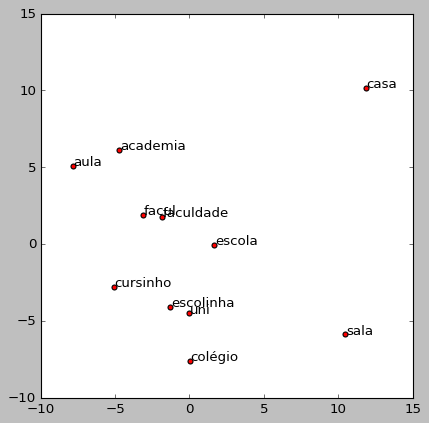

In [49]:
words = ['escola', 'faculdade', 'facul', 'aula', 'sala', 'colégio', 'academia', 'casa', 'escolinha', 'uni', 'cursinho']
display_pca_scatterplot(meu_modelo.wv,words)

In [50]:
nilc_glove.most_similar('escola')

[('alunos', 0.677706778049469),
 ('escolas', 0.6750765442848206),
 ('ensino', 0.6746147274971008),
 ('colégio', 0.6733009815216064),
 ('faculdade', 0.6269355416297913),
 ('aula', 0.6062946319580078),
 ('aulas', 0.6045212149620056),
 ('educação', 0.6030406951904297),
 ('professores', 0.5954740047454834),
 ('escolar', 0.5880724787712097)]

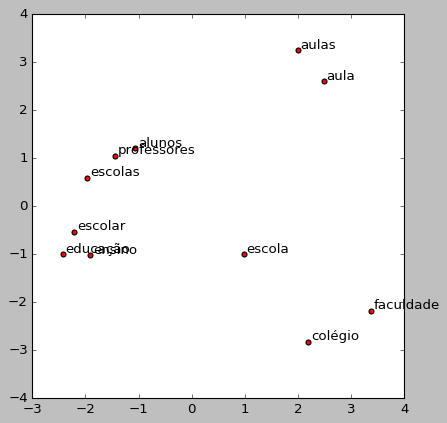

In [51]:
words = ['escola', 'alunos', 'escolas', 'ensino', 'colégio', 'faculdade', 'aula', 'aulas', 'educação', 'professores', 'escolar']
display_pca_scatterplot(nilc_glove,words)